# Data Analysis of A57265X

The sensor has 18 spectral bands that can be measured over time. 

The analysis we performed involved understanding:
1 - The saturation point of the sensor
2 - How the gain and integration cycles would affect the values
3 - Select the gain for the measuring scenario
4 - What would the spectrum look like when pointing to different surfaces:
    - Direct Sunlight
    - Green Grass
    - Brown Grass
    - Floor (concrete)
    - Green Grass (Shadow)
5 - Measured Green, red, blue and yellow fabrics to understand if the relative reflectance values are correlated with the color

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

%matplotlib inline

In [2]:
colors = matplotlib.colormaps["jet"]

In [23]:
# def plotMeterDif(meter1, meter2):
#     fig, axs = plt.subplots(
#     for exposure_i in range(13):
#         plt.plot(
def directsunlightPlot(spectrum):
    colors = matplotlib.colormaps["jet"]
    x = [410, 435, 460, 485, 510, 535, 560, 585, 610, 645, 680, 705, 730, 760, 810, 860, 900, 940]
    for i in range(5):
        plt.plot(x, spectrum[i, 3:-2], color=colors(i/13), label=str(spectrum[i, -2]))
        plt.xlabel("nm")

def plotExposureChange(spectrums_, ax, title):
    colors = matplotlib.colormaps["jet"]
    x = [410, 435, 460, 485, 510, 535, 560, 585, 610, 645, 680, 705, 730, 760, 810, 860, 900, 940]
    for i in range(13):
        ax.plot(x, spectrums_[i, 3:-2], 'o', color=colors(i/13), label=str(spectrums_[i, -2]))
        ax.set_title(title)
        ax.set_xlabel("nm")

def plotCoveredVSNotCovered(spectrum1, spectrum2):
    x = [410, 435, 460, 485, 510, 535, 560, 585, 610, 645, 680, 705, 730, 760, 810, 860, 900, 940]

    plt.plot(x, spectrum1[4, 3:-2], color="b", label="NOT covered")
    plt.plot(x, spectrum2[4, 3:-2], color="r", label="covered")

def plotSurfaceComparison(spectrums_, ax, i, surface, title):
    colors = matplotlib.colormaps["jet"]
    x = [410, 435, 460, 485, 510, 535, 560, 585, 610, 645, 680, 705, 730, 760, 810, 860, 900, 940]
    ax.plot(x, spectrums_[4, 3:-2], color=colors(i/4), label=surface)
    ax.set_xlabel("nm")
    ax.set_title(title)

def plotSurfaceComparisonAmbientLight(spectrums_, ax, i, surface, title):
    colors = matplotlib.colormaps["jet"]
    x = [410, 435, 460, 485, 510, 535, 560, 585, 610, 645, 680, 705, 730, 760, 810, 860, 900, 940]
    ax.plot(spectrums_[4, 2], 'o', color=colors(i/4), label=surface)
    ax.set_xlabel("nm")
    ax.set_title(title)

def plotSurfaceComparisonWhiteLight(spectrums_, ax, i, surface, title):
    colors = matplotlib.colormaps["jet"]
    x = [410, 435, 460, 485, 510, 535, 560, 585, 610, 645, 680, 705, 730, 760, 810, 860, 900, 940]
    ax.plot(spectrums_[4, 1], 'o', color=colors(i/4), label=surface)
    ax.set_xlabel("nm")
    ax.set_title(title)

def plotReflectance1m_2m(spectrum1m, spectrum2m, ax):
    x = [410, 435, 460, 485, 510, 535, 560, 585, 610, 645, 680, 705, 730, 760, 810, 860, 900, 940]

    ax.plot(x, spectrum1m[4, 3:-2], color="b", label="1m")
    ax.plot(x, spectrum2m[4, 3:-2], color="r", label="2m")

def plotExposureChanges(spectrum, ax, title):
    colors = matplotlib.colormaps["jet"]
    x = [410, 435, 460, 485, 510, 535, 560, 585, 610, 645, 680, 705, 730, 760, 810, 860, 900, 940]
    for i in range(13):
        ax.plot(x, spectrum[i, 3:-2], color=colors(i/13), label=str(spectrum[i, -2]))
        ax.set_title(title)
        ax.set_xlabel("nm")

    
# def plotALLDif():

In [4]:
import os

# Get the current directory of the Jupyter Notebook
current_directory = os.getcwd()

# Navigate to the directory containing the file
file_directory = os.path.join(current_directory, "data")
print(file_directory)

C:\Users\jarodrigues519\OneDrive - INL\Projects\TIPODS\Models\TIPODS_experimentCropImages\experiments\experiment_SpectralAnalysis\data


In [27]:
direct_sunlight_coverless = np.loadtxt(file_directory + "/testdirectsun_coverless.txt")
direct_sunlight_covered = np.loadtxt(file_directory + "/testdirectsunlight_cover.txt")

green_grass_1m = np.loadtxt(file_directory + "/testgreengrass_1m_coverless.txt")
green_grass_2m = np.loadtxt(file_directory + "/testgreengrass_2m_coverless.txt")

green_grass_1m_shadow = np.loadtxt(file_directory + "/testgreenshadow_1m_coverless.txt")
green_grass_1m_covered = np.loadtxt(file_directory + "/testtowardsgrass_cupless.txt")

brown_grass_1m = np.loadtxt(file_directory + "/testbrowngrass_1m_coverless.txt")
brown_grass_2m = np.loadtxt(file_directory + "/testbrowngrass_2m_coverless.txt")

floor_1m = np.loadtxt(file_directory + "/testfloor_1m_coverless.txt")
floor_2m = np.loadtxt(file_directory + "/testfloor_2m_coverless.txt")

plants_1m = np.loadtxt(file_directory + "/testplant_1m_coverless.txt")
plants_2m = np.loadtxt(file_directory + "/testplant_2m_coverless.txt")

## Experiment Changes in Integration Cycles

We are plotting how the integration cycles affect the resulting spectrum intensities in different targets.

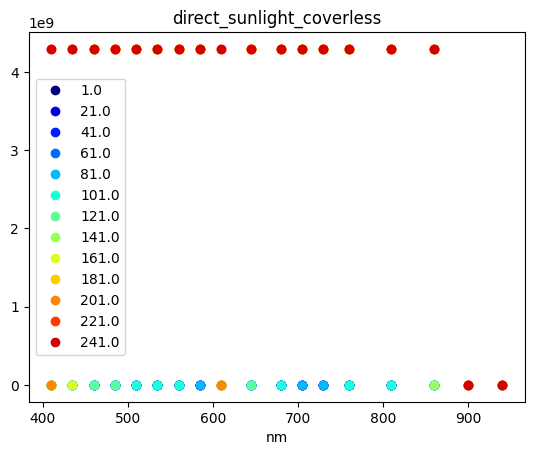

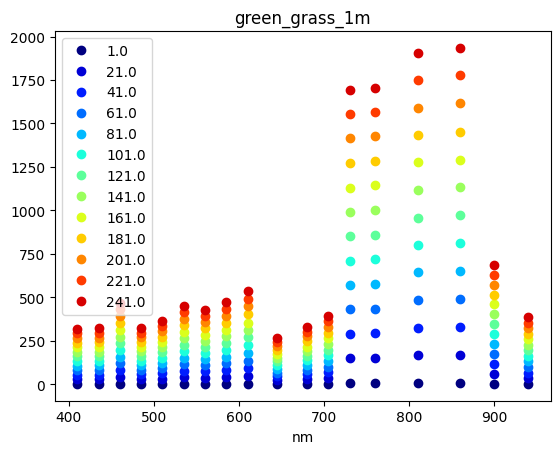

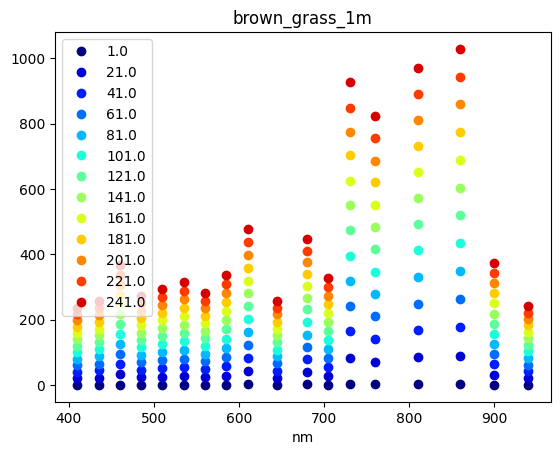

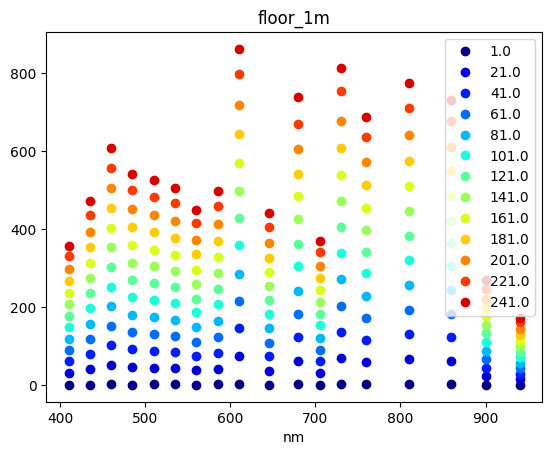

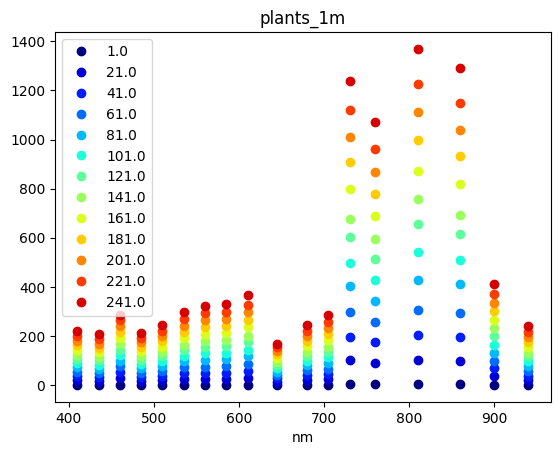

In [7]:
for i, (spectrum_i, title) in enumerate(zip([direct_sunlight_coverless, green_grass_1m, brown_grass_1m, floor_1m, plants_1m], ["direct_sunlight_coverless", "green_grass_1m", "brown_grass_1m", "floor_1m", "plants_1m"])):
    fig, axs = plt.subplots(1, 1)
    plotExposureChange(spectrum_i, axs, title)
    plt.legend()

## Experiment Direct Sunlight Without Saturation

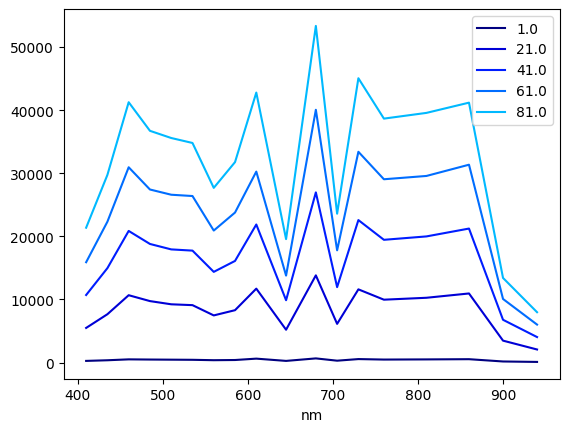

In [8]:
directsunlightPlot(direct_sunlight_coverless)
plt.legend()

## Compare Direct Sunlight Covered and Not Covered

Use the maximum integration cycle without saturation and compare covered vs uncovered spectrum

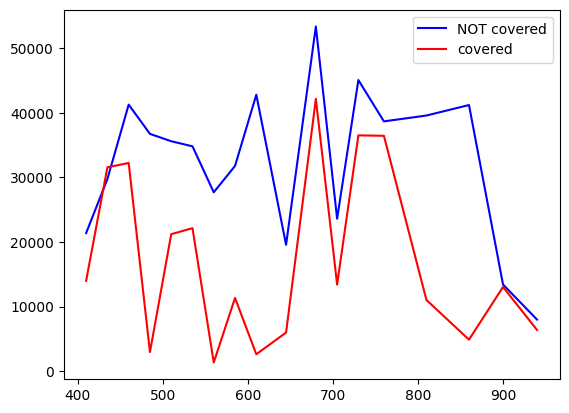

In [9]:
plotCoveredVSNotCovered(direct_sunlight_coverless, direct_sunlight_covered)
plt.legend()

## Compare Surfaces for 81 integration cycles (Not Covered)

C:\Users\jarodrigues519\AppData\Local\Temp\ipykernel_11640\3628876533.py:8: RuntimeWarning: invalid value encountered in divide
  plotSurfaceComparison(spectrum/direct_sunlight_coverless[4, :], ax3, i, surface, "Normalized by total reflectance")


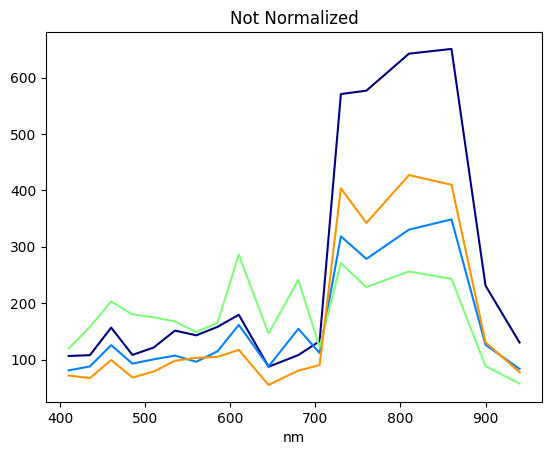

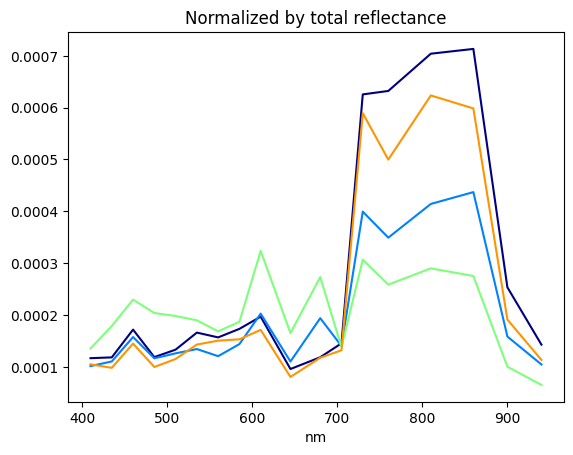

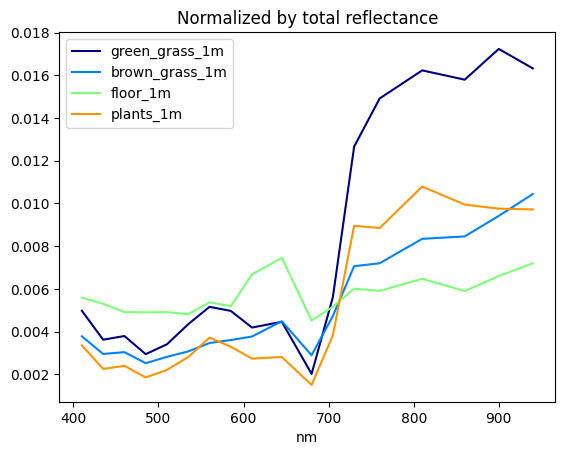

In [10]:
fig1, ax1 = plt.subplots(1, 1)
fig2, ax2 = plt.subplots(1, 1)
fig3, ax3 = plt.subplots(1, 1)

for i, (spectrum, surface) in enumerate(zip([green_grass_1m, brown_grass_1m, floor_1m, plants_1m], ["green_grass_1m", "brown_grass_1m", "floor_1m", "plants_1m"])):
    plotSurfaceComparison(spectrum, ax1, i, surface, "Not Normalized")
    plotSurfaceComparison(spectrum/np.sum(spectrum), ax2, i, surface, "Normalized by total reflectance")
    plotSurfaceComparison(spectrum/direct_sunlight_coverless[4, :], ax3, i, surface, "Normalized by total reflectance")
plt.legend()

C:\Users\jarodrigues519\AppData\Local\Temp\ipykernel_11640\46542213.py:3: RuntimeWarning: invalid value encountered in divide
  plotExposureChanges(green_grass_1m/direct_sunlight_coverless[4, :], ax, "Compare Exposures")


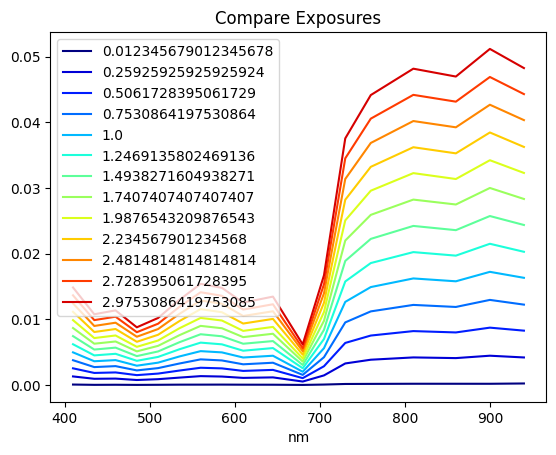

In [11]:
plt.figure()
ax = plt.subplot(111)
plotExposureChanges(green_grass_1m/direct_sunlight_coverless[4, :], ax, "Compare Exposures")
plt.legend()

## Compare 1m and 2m reflectances

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


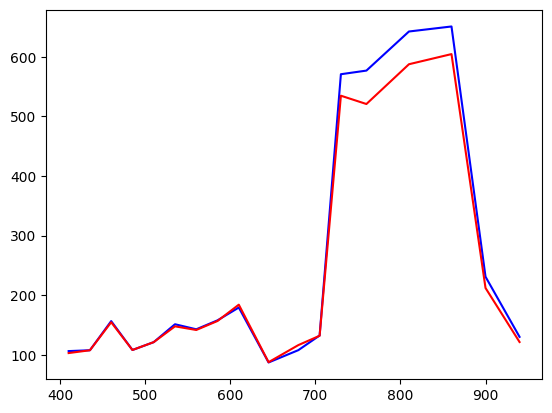

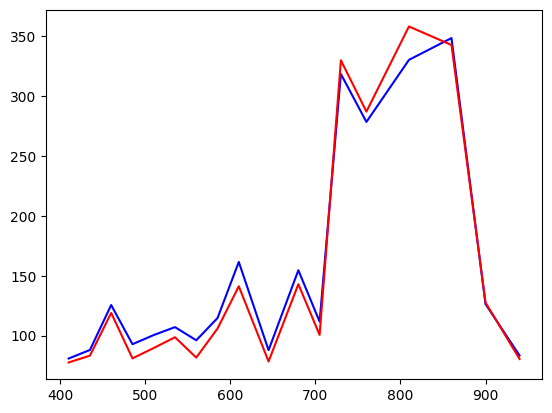

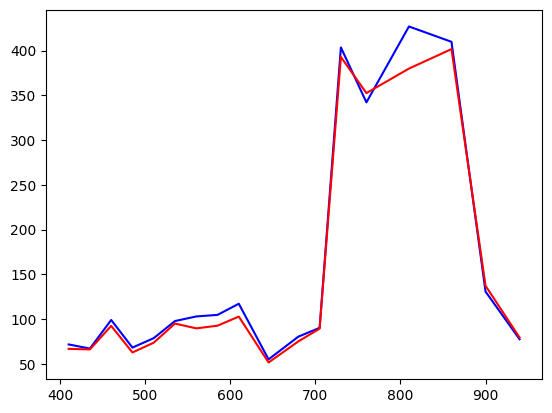

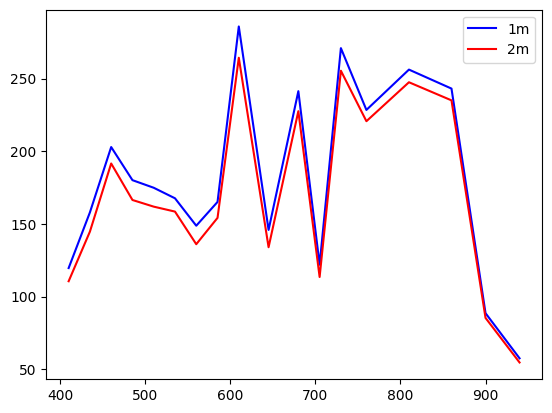

In [12]:
fig1, ax1 = plt.subplots(1, 1)
fig2, ax2 = plt.subplots(1, 1)
fig3, ax3 = plt.subplots(1, 1)
fig4, ax4 = plt.subplots(1, 1)

plotReflectance1m_2m(green_grass_1m, green_grass_2m, ax1)
plt.legend()
plotReflectance1m_2m(brown_grass_1m, brown_grass_2m, ax2)
plt.legend()
plotReflectance1m_2m(plants_1m, plants_2m, ax3)
plt.legend()
plotReflectance1m_2m(floor_1m, floor_2m, ax4)
plt.legend()

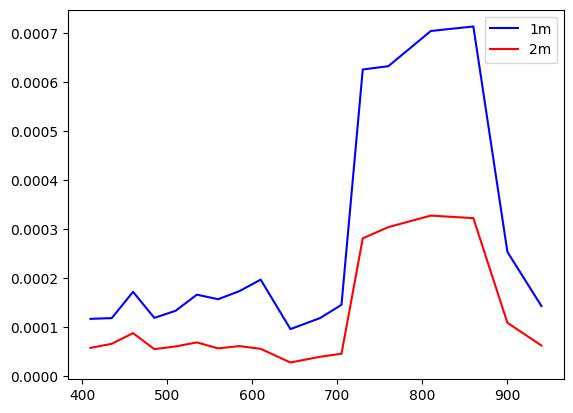

In [13]:
ax1 = plt.subplot(111)
plotReflectance1m_2m(green_grass_1m/np.sum(green_grass_1m), green_grass_1m_shadow/np.sum(green_grass_1m_shadow), ax1)
plt.legend()

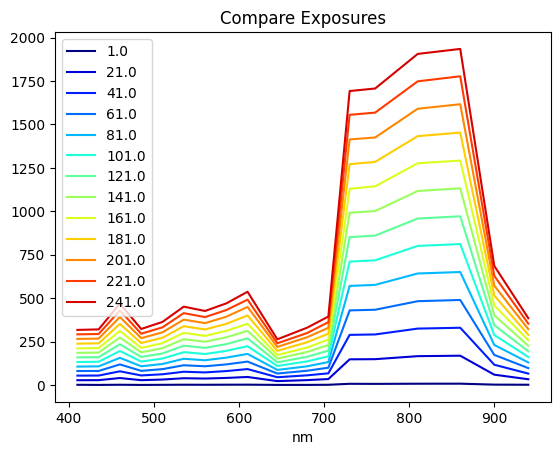

In [14]:
plt.figure()
ax = plt.subplot(111)
plotExposureChanges(green_grass_1m, ax, "Compare Exposures")
plt.legend()

In [29]:
plt.figure()
plt.plot(green_grass_1m[5, 3:-2])
plt.plot(green_grass_1m_covered[4, 3:-2])

## Comparing Ambient Light Values in different surfaces

In [24]:
fig1, ax1 = plt.subplots(1, 1)
fig2, ax2 = plt.subplots(1, 1)

for i, (spectrum, surface) in enumerate(zip([green_grass_1m, brown_grass_1m, floor_1m, plants_1m], ["green_grass_1m", "brown_grass_1m", "floor_1m", "plants_1m"])):
    plotSurfaceComparisonAmbientLight(spectrum, ax1, i, surface, "Not Normalized")
    plotSurfaceComparisonWhiteLight(spectrum, ax2, i, surface, "Not Normalized")
plt.legend()


## Conclusions

### Cover VS Not Cover

The halfsphere cover affects the measured specturm and cannot be reliably used for the pilot experiments. The reason could either be internal reflections and/or material. 

**TODOs**: Find a cover that can be used (test acrylic and glass covers. Maybe flat ones and possibly tilted)

### Integration Cycles

1. For direct sunlight, with minimal gain, at least one of the bands saturates at 81 integration cycles.
2. This means we might have to use this integration cycle for all measurements.
3. Another possibility can be taking multiple measurements for each waveband at their saturation point.
4. The pattern of the spectrum seems to be constant for all integration cycles if no saturation is verified.

**TODOs**: 
1. Check if the normalization is really necessary
2. If we could use different integration cycles for the sensor directed towards the sun and the sensor looking down on the pilot.

### Surface Comparison

1. Homogeneous green grass pattern fits the expected reflectance spectrum of vegetation (when normalized by total sunlight reflectance)
2. This means that green grass was able to be distinguished from a concrete surface, and also from brownish grass. The latter is specially different in the infrared spectrum. In theory this makes sense.
3. We also notice the difference in the raw spectrum and normalized spectrum.
4. The relectance pattern is not much affected by the height of the measurement, but mostly by the surface. (In homogeneous conditions and differences of 1m height, only amplitude is affected, but this can be changed by the integration cycle).
5. The green grass had higher reflectance in the infrared than brown grass and plants. This makes sense, as the brown grass should be less active in photosynthesis and plants were not homogeneous, having dirt spaces in between plants.

Notes: The floor surface might not have been totally homogeneous (not infinte sized floor), as the floor was limited by grass.

**TODOS**:
1. Check if the orientation of the sensor needs to be aligned to capture the specular reflection
2. Measure the same surfaces when not aligned with the direction of the sun (no specular reflection) and compare the spectrums with the specular reflections (do we notices simple attenuations? Or does the pattern change? Should we place the sensor targetting the sun?)
3. Compare higher differences of heights

### Measurement Notes

1. We were careful in taking measurements for each surface and each conditions
2. We were measuring specular reflection
3. What else, besides vegetation indexes, can we use this sensor for:
   a. Distinguish the type of vegetation
   b. Density of vegetation
   c. Color
   d. Calibrate the camera for 2D vegetation indexes?
   e. For a given vegetation, can we make an estimation of the height?
   f. Can we check if the vegetation is wet? (Strong absorption on IR bands)

**TODOS**:
1. Find what is the proper position of the sensor to maximize sensitivity as we are measuring non-homogeneous surfaces (*for the pilot - should it be between rows, at which height, strongly dependent on nearby vegetation, specially grass in the middle, etc...*)

### QUESTIONS FOR PILOT

1. **Q:** Will we be measuring grass growing in between vine tree rows? How could we test it?
   **R:** Go to a vineyard without grass in between the rows. We could simply take freshly cut grass and spread it in between rows with incremental amount of grass. In this way, we could see how the spectrum varies and which are the contributions from the grass (if any). Besides, we could take the measurement from different heights, and understand how far the sensor needs to be, to measure the vegetation growing from the trees but not from the floor.
2. How are the weather conditions affecting our readings
3. How many readings per day?